In [1]:
using DataFrames, CSV
using Plots
pyplot();

┌ Info: Precompiling PyPlot [d330b81b-6aea-500a-939a-2ce795aea3ee]
└ @ Base loading.jl:1260
Matplotlib is building the font cache; this may take a moment.


In [2]:
data = CSV.read("Data.csv");

┌ Warning: `CSV.read(input; kw...)` is deprecated in favor of `using DataFrames; CSV.read(input, DataFrame; kw...)
│   caller = read(::String) at CSV.jl:40
└ @ CSV /home/angicia/.julia/packages/CSV/MKemC/src/CSV.jl:40


In [3]:
data

,YearsExperience,Salary
,Float64,Int64
1,1.1,39343
2,1.3,46205
3,1.5,37731
4,2.0,43525
5,2.2,39891
6,2.9,56642
7,3.0,60150
8,3.2,54445
9,3.2,64445


In [4]:
newnames = ["YearsExperience", "Salary"];
names!(data, Symbol.(newnames));

┌ Warning: `names!(df::AbstractDataFrame, vals::Vector{Symbol}; makeunique::Bool = false)` is deprecated, use `rename!(df, vals, makeunique = makeunique)` instead.
│   caller = top-level scope at In[4]:2
└ @ Core In[4]:2


In [5]:
X = data[:YearsExperience];  #features
y = data[:Salary];  #Y-values

┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = top-level scope at In[5]:1
└ @ Core In[5]:1
┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = top-level scope at In[5]:2
└ @ Core In[5]:2


In [6]:
num_tr_ex = length(y);

In [7]:
num_tr_ex

30

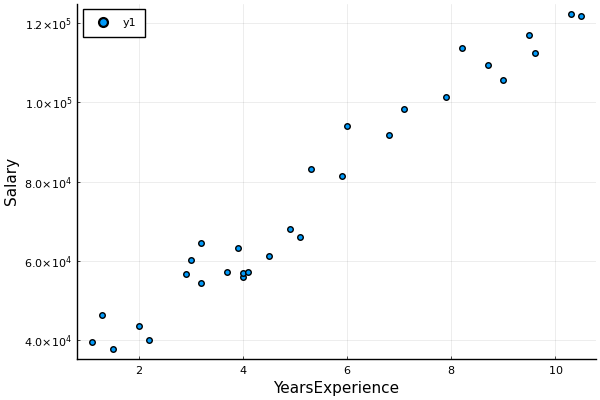

In [8]:
scatter(X,y, xaxis="YearsExperience", yaxis="Salary")

In [9]:
using GLM
linearRegressor = lm(@formula(Salary ~ YearsExperience), data)

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Array{Float64,1}},GLM.DensePredChol{Float64,LinearAlgebra.Cholesky{Float64,Array{Float64,2}}}},Array{Float64,2}}

Salary ~ 1 + YearsExperience

Coefficients:
────────────────────────────────────────────────────────────────────────────
                    Coef.  Std. Error      t  Pr(>|t|)  Lower 95%  Upper 95%
────────────────────────────────────────────────────────────────────────────
(Intercept)      25792.2     2273.05   11.35    <1e-11   21136.1     30448.3
YearsExperience   9449.96     378.755  24.95    <1e-19    8674.12    10225.8
────────────────────────────────────────────────────────────────────────────

In [10]:
linearFit = predict(linearRegressor)

30-element Array{Float64,1}:
  36187.158752269264
  38077.151216560276
  39967.143680851295
  44692.12484157883
  46582.11730586985
  53197.0909308884
  54142.08716303391
  56032.07962732493
  56032.07962732493
  60757.06078805247
  62647.05325234348
  63592.04948448899
  63592.04948448899
      ⋮
  81546.97789525364
  82491.97412739915
  90051.9439845632
  92886.93268099974
 100446.90253816379
 103281.8912346003
 108006.87239532787
 110841.86109176438
 115566.84225249192
 116511.83848463744
 123126.81210965599
 125016.80457394701

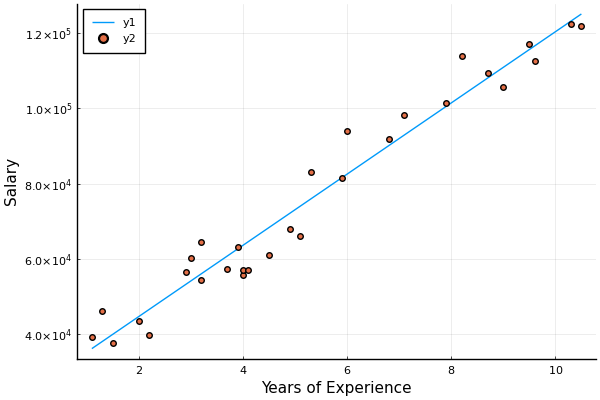

In [11]:
plot(X,linearFit)
scatter!(X,y, xaxis="Years of Experience", yaxis="Salary")